In [1]:
import os, sys
# Path of the folder containing the buffer client                                              
try:
    pydir=os.path.dirname(__file__)
except:
    pydir=os.getcwd()

sigProcPath = '../../python/signalProc'
sys.path.append(os.path.join(os.path.abspath(pydir),sigProcPath))
import bufhelp
plottingPath= '../../python/plotting'
sys.path.append(os.path.join(os.path.abspath(pydir),plottingPath))
from image3d import *
from scipy.io import loadmat
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#load the datafile, and extract the variables                                                  
data=loadmat('ERPdata.mat')
X     =data['X']
Y     =data['Y'].reshape(-1)
fs    =data['fs'][0]
Cnames=data['Cnames'].reshape(-1)
Cpos  =data['Cpos']

In [6]:
X.shape

(64, 76, 300)

([<matplotlib.axes._axes.Axes at 0x7f747ee02128>,
 <function matplotlib.pyplot.gcf>)

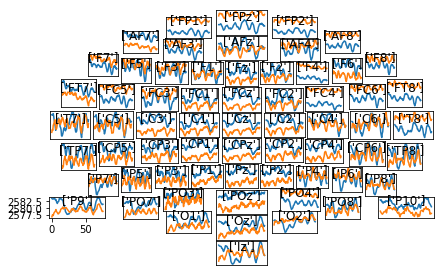

In [6]:
# plot the class averages
erp=np.stack((X[:,:,Y>0].mean(2),X[:,:,Y<=0].mean(2)),2) #compute the ERP
image3d(erp,0,plotpos=Cpos,xvals=Cnames) # plot the ERPs


In [7]:
import pickle

In [33]:
data_p = pickle.load(open('../../python/brainfly/matlab_data.pkl', 'rb'))
data = data_p['data']
y = data_p['events']

In [36]:
data = np.array(data)
data = data.transpose(0, 2, 1)
data = [d for d in data]

In [37]:
import preproc

In [38]:
data = [d[:, :10] for d in data]
data = preproc.detrend(data)
# 2: bad-channel removal
data, bad_channels = preproc.badchannelremoval(data)
print(f'Removed channels: {bad_channels}')
# 3: apply spatial filter
data = preproc.spatialfilter(data, type='car')
# 4 & 5: map to frequencies and select frequencies of interest
data = preproc.spectralfilter(data, (5, 6, 31, 32), 128.)

Removed channels: []


In [39]:
X.shape

(240, 19, 10)

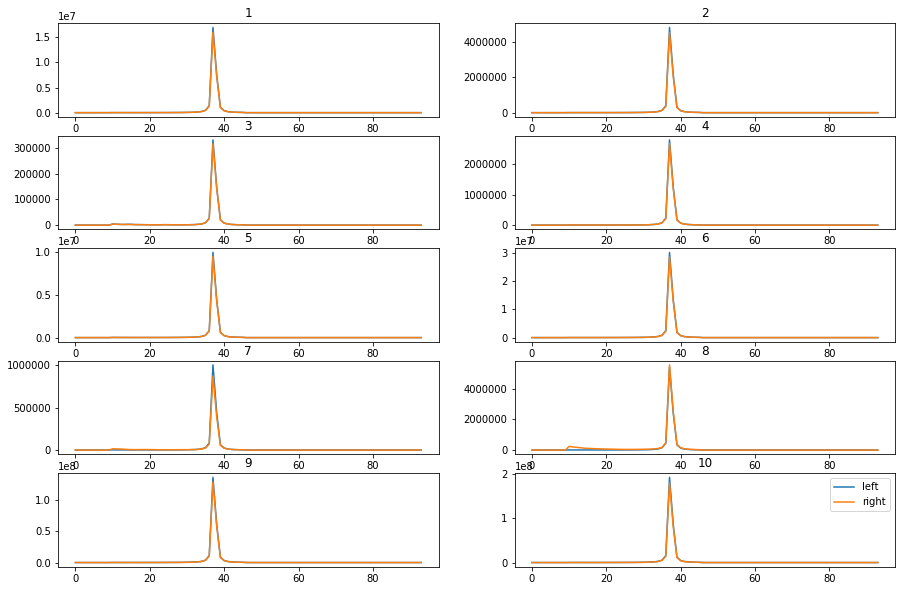

In [41]:
X = np.array(data)
y = np.array(y)
mean_left = X[y==0].mean(axis=0)
mean_right = X[y==1].mean(axis=0)
plt.figure(figsize=(10, 10))
_, axs = plt.subplots(5, 2, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(i+1)
    ax.plot(mean_left[:, i], label='left')
    ax.plot(mean_right[:, i], label='right')
plt.legend()
plt.show()